In [1]:
import pandas as pd
import openml

In [3]:
data_dir = "../data/meta_features_classification.csv"
dataframe = pd.read_csv(data_dir)

In [4]:
dataframe.iloc[:, 1:].isnull().sum(axis = 0).sort_values()

PercentageOfSymbolicFeatures                 4
PercentageOfMissingValues                    4
PercentageOfInstancesWithMissingValues       4
PercentageOfBinaryFeatures                   4
NumberOfSymbolicFeatures                     4
                                          ... 
Quartile3MutualInformation                1037
Quartile2MutualInformation                1037
MeanMutualInformation                     1037
MeanNoiseToSignalRatio                    1049
EquivalentNumberOfAtts                    1049
Length: 107, dtype: int64

In [5]:
dataframe.iloc[:, 1:].isnull().sum(0).value_counts()

611     45
488     24
4       13
1037    12
69       4
332      4
35       2
1049     2
341      1
dtype: int64

In [2]:
datasets = openml.datasets

In [3]:
dataset_df =datasets.list_datasets(output_format="dataframe")

In [4]:
dataset = datasets.get_dataset(274)
X, y, _, _ = dataset.get_data(dataset_format="array", target = dataset.default_target_attribute)

In [4]:
dataset_df.query("NumberOfFeatures > 500000").index

Int64Index([], dtype='int64')

In [18]:
from pymfe.mfe import MFE
mfe = MFE()
#groups=["general", "statistical", "info-theory", "landmarking", "model-based"]

In [19]:
mfe = MFE(groups=["landmarking"])

In [20]:
mfe.fit(X,y)
mfe.extract()

c:\Users\wiche\OneDrive\Bureaublad\MasterThesis\masterthesisenv\lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


In [ ]:
dataset = datasets.get_dataset(274)
X, y, _, _ = dataset.get_data(dataset_format="dataframe", target = dataset.default_target_attribute)


In [ ]:
df = pd.DataFrame(X)

In [7]:
df

,0
0,"(0, 2)\t1.0\n (0, 4)\t1.0\n (0, 6)\t1.0\n ..."
1,"(0, 25)\t1.0\n (0, 65)\t1.0\n (0, 154)\t1...."
2,"(0, 30)\t1.0\n (0, 205)\t1.0\n (0, 322)\t1..."
3,"(0, 2)\t1.0\n (0, 24)\t1.0\n (0, 194)\t1.0..."
4,"(0, 45)\t1.0\n (0, 46)\t1.0\n (0, 180)\t1...."
...,...
120914,"(0, 0)\t1.0\n (0, 13)\t1.0\n (0, 22)\t1.0\..."
120915,"(0, 20)\t1.0\n (0, 27)\t1.0\n (0, 59)\t1.0..."
120916,"(0, 19)\t1.0\n (0, 22)\t1.0\n (0, 46)\t1.0..."
120917,"(0, 18)\t1.0\n (0, 39)\t1.0\n (0, 78)\t1.0..."


In [12]:
dff = openml.datasets.list_datasets(output_format="dataframe")

<AxesSubplot: >

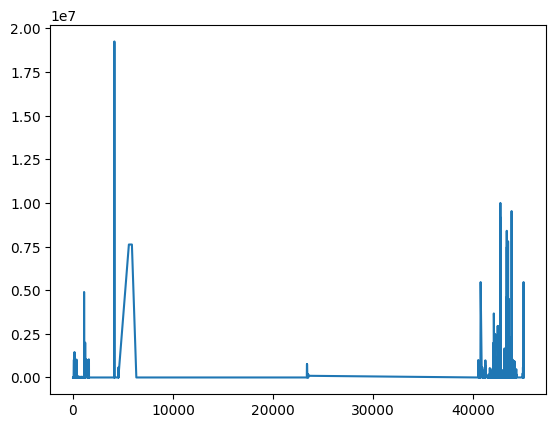

In [16]:
dff["NumberOfInstances"].plot()

In [56]:
for col, valu in zip(columns, values):
    if 'cor' in col:
        print(valu)

0.7997997941644847
nan
0.08060769908924477
0.09776972798730603
0.018181818181818177
0.04430364474834585
0.012698412698412698


In [57]:
import openml

openml.datasets.get_dataset(2).get_data()

(    family product-type steel  carbon  hardness temper_rolling condition  \
 0      NaN            C     A     8.0       0.0            NaN         S   
 1      NaN            C     R     0.0       0.0            NaN         S   
 2      NaN            C     R     0.0       0.0            NaN         S   
 3      NaN            C     A     0.0      60.0              T       NaN   
 4      NaN            C     A     0.0      60.0              T       NaN   
 ..     ...          ...   ...     ...       ...            ...       ...   
 893    NaN            C     R     0.0       0.0            NaN         S   
 894    NaN            C     R     0.0       0.0            NaN         S   
 895    NaN            C     V     0.0       0.0            NaN         S   
 896    NaN            C     A     0.0      85.0              T       NaN   
 897    NaN            C     A     0.0      85.0              T       NaN   
 
     formability  strength non-ageing  ...    s    p  shape  thick   width